In [842]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [805]:
df = pd.read_csv(r"C:\Desktop\Datasets\archive\data.csv")

In [807]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [809]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

In [811]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB


In [813]:
# checking for duplicated rows
df.duplicated().sum()

0

In [815]:
# checking all the columns that have null values in them
test = (df.isna().sum()).to_numpy().nonzero()
columns_to_check = df.columns[test]

In [817]:
# a function that gets the percentages of null values in all the columns that have them
def get_null_percentages(df, columns):
    result = {}
    for column in columns:
        if column in df.columns:
            null_count = df[column].isna().sum()
            total_count = len(df)
            null_percentage = (null_count / total_count) * 100
            result[column] = round(null_percentage, 2)
        else:
            print("Column not found")
    return result

null_percentages = get_null_percentages(df, columns_to_check)
null_percentages
for column, percentage in null_percentages.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage} %")
    else:
        print(f"{column}: {percentage}")

club_name: 1.19 %
league_name: 1.19 %
league_rank: 1.19 %
release_clause_eur: 5.25 %
player_tags: 92.57 %
team_position: 1.19 %
team_jersey_number: 1.19 %
loaned_from: 96.0 %
joined: 5.19 %
contract_valid_until: 1.19 %
nation_position: 94.05 %
nation_jersey_number: 94.05 %
pace: 11.0 %
shooting: 11.0 %
passing: 11.0 %
dribbling: 11.0 %
defending: 11.0 %
physic: 11.0 %
gk_diving: 89.0 %
gk_handling: 89.0 %
gk_kicking: 89.0 %
gk_reflexes: 89.0 %
gk_speed: 89.0 %
gk_positioning: 89.0 %
player_traits: 56.11 %
defending_marking: 100.0 %


[Text(0.5, 1.0, 'Percentage of Missing Values'),
 Text(0.5, 0, 'Percentages (%)'),
 Text(0, 0.5, 'Features')]

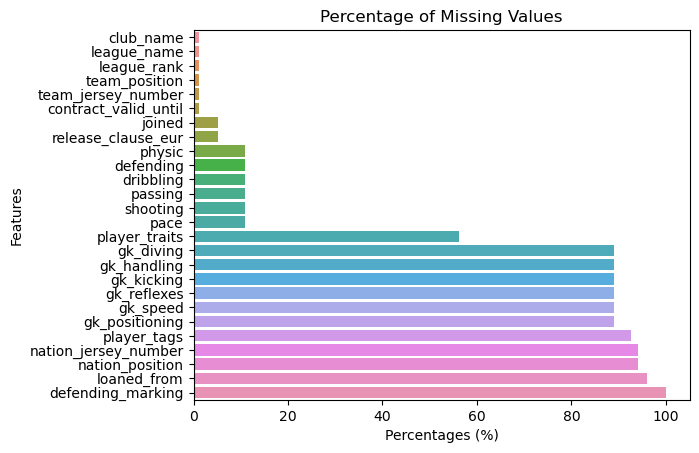

In [819]:
# using a bar chart to visualize the percentages of null values
null_values = pd.Series(data=null_percentages).sort_values()
sns.barplot(x=null_values.values, y=null_values.index).set(title='Percentage of Missing Values', xlabel='Percentages (%)', ylabel='Features')

In [866]:
# in all the gk columns, those values will only be applicable if the player is a goalkeeper
# hence we replace all the NaN values that exist for non-goalkeeper players with 0 since they will not have gk stats
gk_columns = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']
for column in gk_columns:
    df[column].fillna(0, inplace=True)

In [823]:
# since for the columns club_name, league_name, league_rank, team_position, team_jersey_number, contract_valid_until, the null percentage is less than 10%
# we can simply drop the rows that contain null values
# we can also infer that these are the players without a team or a contract, hence all these columns are null for them
no_team_columns = ['club_name', 'league_name', 'league_rank', 'team_position', 'team_jersey_number', 'contract_valid_until']
for column in no_team_columns:
    df.dropna(subset=no_team_columns, inplace=True)

In [825]:
# instead of having 2 columns signifying the jersey number and position of a player in the national team (nation_jersey_number, nation_position)
# we can just have one column signifying if the player was on the national team or not and drop the specific columns
df['national_team'] = df['nation_position'].notnull()
df.drop(['nation_jersey_number', 'nation_position'], axis=1, inplace=True)

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


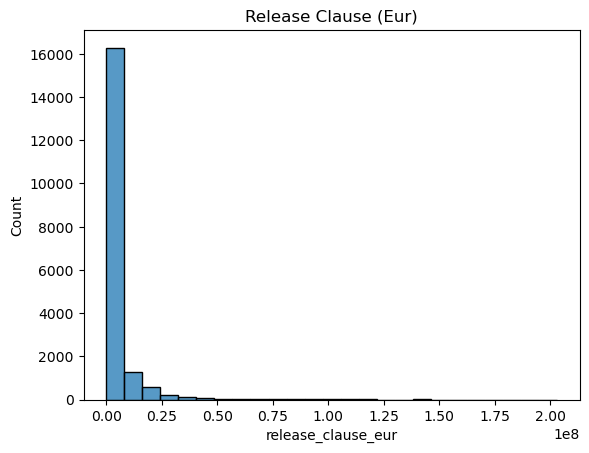

In [860]:
df['release_clause_eur'].describe()
# here we can see that the mean of the data is higher than the median
# this implies that the data in this column is skewed
sns.histplot(df['release_clause_eur'], bins=25).set(title='Release Clause (Eur)')
plt.show()

In [850]:
# we can hence replace the null values in this column with the median of the data
median_value = df['release_clause_eur'].median()
df['release_clause_eur'].fillna(median_value, inplace=True)

In [786]:
# we can drop the columns having a null percentage rate greater than 95% (defending_marking, loaned_from)
df.drop(['defending_marking', 'loaned_from'], axis=1, inplace=True)

In [1000]:
# for the columns player_tags and player_traits there could be a way to fill in the missing values by analysing the other characteristics of the player and relating them to the tags and traits
# for eg. if a player had x value for dribbling and they have the dribbler tag,  we can relate all those players who have that value for dribbler or above and assign them the dribbler tag
# we can similarly do that for player traits

In [790]:
# making a list of all the unique tags in the player_tags column
unique_tags = []
for item in df.loc[df['player_tags'].notnull()]['player_tags'].unique():
    unique_tags.append(item.split(", "))
unique_tags = list(set(x for l in  unique_tags for x in l))
unique_tags

['#Aerial Threat',
 '#Complete Midfielder',
 '#Complete Defender',
 '#Clinical Finisher',
 '#Complete Forward',
 '#Engine',
 '#Playmaker',
 '#Tactician',
 '#Strength',
 '#Acrobat',
 '#Dribbler',
 '#Tackling',
 '#Poacher',
 '#Distance Shooter',
 '#FK Specialist',
 '#Crosser',
 '#Speedster']

In [792]:
# we can then find threshold values by analysing the data that contains that specific tag 
# then for any players that don't have tags, we can analyse the threshold values for each tag and accordingly assign tags to players
# i don't know enough about football to know what statistics would affect what tags 
# we can also follow a similar approach with traits

In [794]:
# making a list of all the unique traits in the player_traits column
unique_traits = []
for item in df.loc[df['player_traits'].notnull()]['player_traits'].unique():
    unique_traits.append(item.split(", "))
unique_traits = list(set(x for l in unique_traits for x in l))
unique_traits

['Chip Shot (AI)',
 'Dives Into Tackles (AI)',
 'Speed Dribbler (AI)',
 'Power Free-Kick',
 'Finesse Shot',
 'Flair',
 'Technical Dribbler (AI)',
 'GK Long Throw',
 'Long Shot Taker (AI)',
 'One Club Player',
 'Power Header',
 'Giant Throw-in',
 'Solid Player',
 'Rushes Out Of Goal',
 'Cautious With Crosses',
 'Early Crosser',
 'Long Passer (AI)',
 'Injury Prone',
 'Long Throw-in',
 'Team Player',
 'Comes For Crosses',
 'Playmaker (AI)',
 'Leadership',
 'Saves with Feet',
 'Outside Foot Shot']

In [796]:
# we can replace the null values in the joined column with a clearly invalid date (eg: 1900-1-1) to indicate that we do not have this data
df['joined'].fillna('1900-1-1', inplace=True)

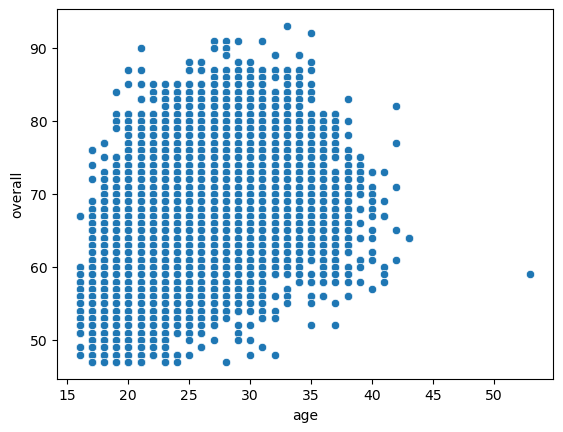

In [1032]:
sns.scatterplot(data=df, x='age', y='overall')
plt.show()
# here we can see that the best overall players are between 25 to 35 and there are very few players over the age of 40

In [1030]:
# analysing goalkeepers
df_gk = df.loc[df['player_positions'] == 'GK'][gk_columns]
df_gk

,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
2,87.0,92.0,78.0,90.0,52.0,90.0
7,88.0,85.0,88.0,90.0,45.0,88.0
9,86.0,88.0,85.0,89.0,51.0,91.0
12,84.0,89.0,74.0,88.0,48.0,85.0
16,87.0,87.0,91.0,89.0,57.0,86.0
...,...,...,...,...,...,...
18892,49.0,48.0,47.0,50.0,34.0,47.0
18908,46.0,46.0,58.0,51.0,30.0,44.0
18913,47.0,46.0,46.0,50.0,20.0,45.0
18924,49.0,47.0,45.0,46.0,54.0,44.0


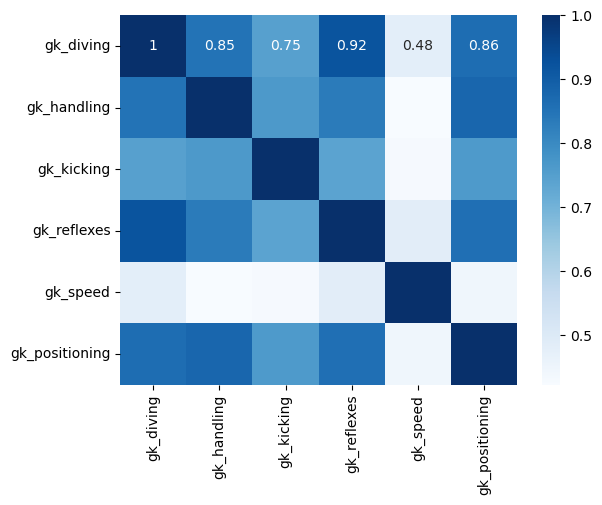

In [900]:
sns.heatmap(df_gk.corr(), cmap='Blues', annot=True)
plt.show()
# we can see there is a strong correlation between reflexes and diving and that speed is not really correlated with anything

In [894]:
# analysing primary attributes of a player
primary_attributes = ['physic', 'defending', 'dribbling', 'passing', 'shooting', 'pace']
df_primary = df[primary_attributes]
# we can drop the null values here since replacing them with averages doesn't make sense
df_primary.dropna()

,physic,defending,dribbling,passing,shooting,pace
0,65.0,38.0,95.0,91.0,92.0,85.0
1,77.0,35.0,89.0,81.0,93.0,89.0
3,82.0,43.0,85.0,78.0,91.0,78.0
4,59.0,36.0,94.0,86.0,85.0,91.0
5,78.0,64.0,88.0,93.0,86.0,76.0
...,...,...,...,...,...,...
18939,50.0,41.0,47.0,50.0,37.0,63.0
18940,48.0,50.0,27.0,26.0,23.0,58.0
18941,55.0,45.0,36.0,29.0,25.0,51.0
18942,58.0,44.0,48.0,48.0,35.0,61.0


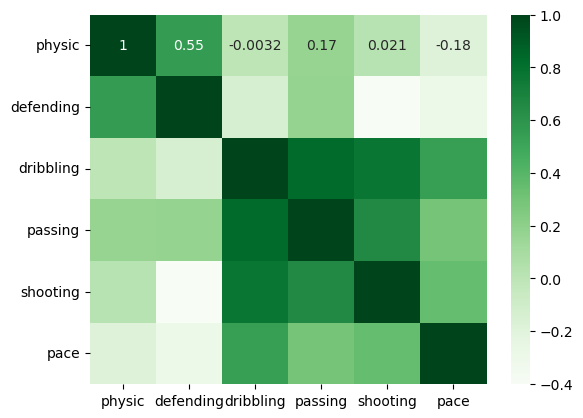

In [908]:
sns.heatmap(df_primary.corr(), cmap='Greens', annot=True)
plt.show()
# here we can see that defending is obviously at odds with shooting, dribbling and pace while it is somewhat correlated with passing and physic

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


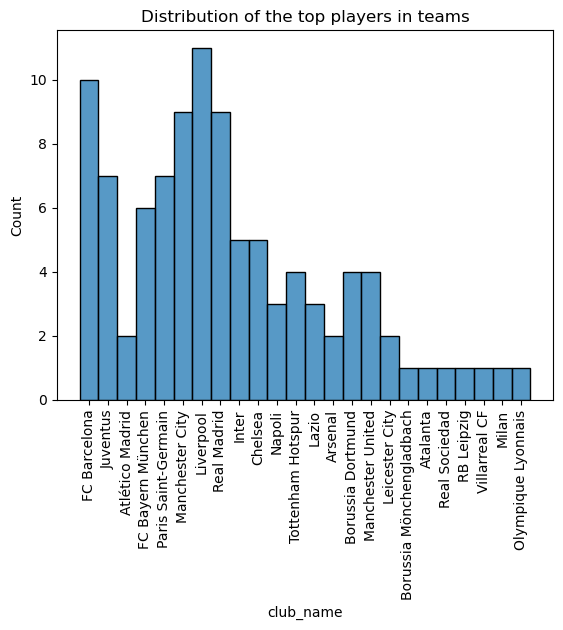

In [956]:
# analysis of some of the top players
df_top = df.sort_values(['overall'], ascending=False).head(100)
sns.histplot(df_top['club_name']).set(title='Distribution of the top players in teams')
plt.xticks(rotation='vertical')
plt.show()
# here we can see that Liverpool has the largest number of top players followed closely by FC Barcelona

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


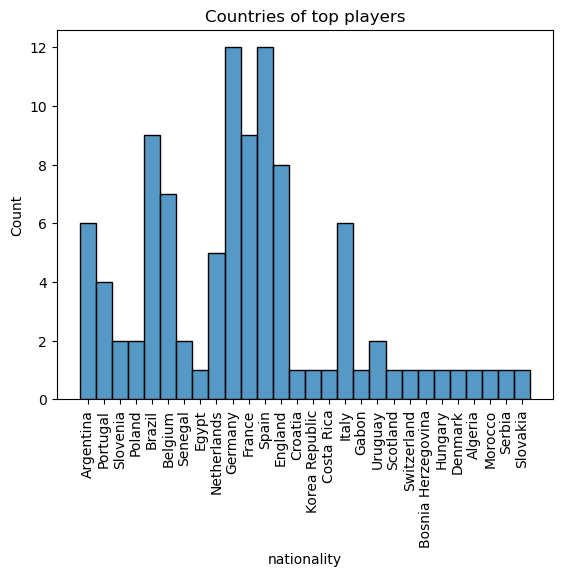

In [992]:
# analysing the countries the top players are in
sns.histplot(data=df_top['nationality']).set(title='Countries of top players')
plt.xticks(rotation='vertical')
plt.show()
# we see that Germany and France are tied for the highest number of top players, followed by Brazil and France

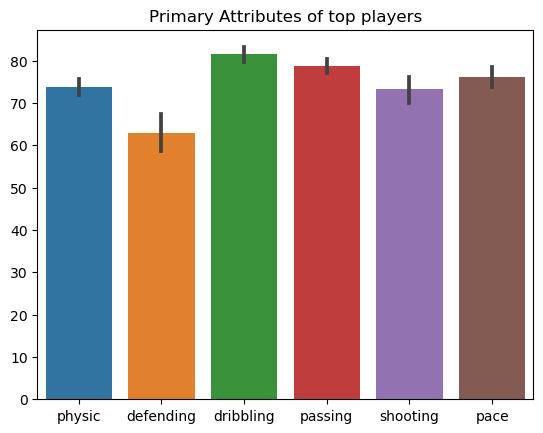

In [984]:
# if we compare the primary attributes of the top players
sns.barplot(data=df_top[primary_attributes]).set(title='Primary Attributes of top players')
plt.show()
# here we can see that the average values for dribbling, passing and pace are comparatively higher than that of defending implying that the top players are generally more skilled in the former